In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image = cv2.imread('/content/drive/MyDrive/Computer Vision Masterclass/Images/megan.jpg')

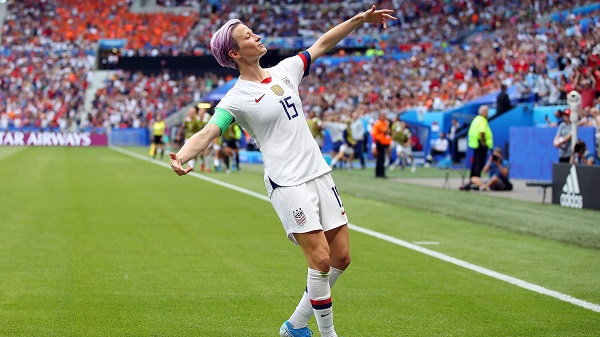

In [ ]:
cv2_imshow(image)

In [ ]:
image.shape , image.shape[0]*image.shape[1]*image.shape[2]

((337, 600, 3), 606600)

In [ ]:
#this is to change the format of the image
image_blob = cv2.dnn.blobFromImage(image = image, scalefactor = 1.0 / 255,size = (image.shape[1],image.shape[0]))

In [ ]:
type(image_blob), image_blob.shape #1 is the number of elements in the batch, 3 is channel

(numpy.ndarray, (1, 3, 337, 600))

In [ ]:
network = cv2.dnn.readNetFromCaffe('/content/drive/MyDrive/Computer Vision Masterclass/Weights/pose_deploy_linevec_faster_4_stages.prototxt',
                                   '/content/drive/MyDrive/Computer Vision Masterclass/Weights/pose_iter_160000.caffemodel')

In [ ]:
network.getLayerNames()

('conv1_1',
 'relu1_1',
 'conv1_2',
 'relu1_2',
 'pool1_stage1',
 'conv2_1',
 'relu2_1',
 'conv2_2',
 'relu2_2',
 'pool2_stage1',
 'conv3_1',
 'relu3_1',
 'conv3_2',
 'relu3_2',
 'conv3_3',
 'relu3_3',
 'conv3_4',
 'relu3_4',
 'pool3_stage1',
 'conv4_1',
 'relu4_1',
 'conv4_2',
 'relu4_2',
 'conv4_3_CPM',
 'relu4_3_CPM',
 'conv4_4_CPM',
 'relu4_4_CPM',
 'conv5_1_CPM_L1',
 'relu5_1_CPM_L1',
 'conv5_1_CPM_L2',
 'relu5_1_CPM_L2',
 'conv5_2_CPM_L1',
 'relu5_2_CPM_L1',
 'conv5_2_CPM_L2',
 'relu5_2_CPM_L2',
 'conv5_3_CPM_L1',
 'relu5_3_CPM_L1',
 'conv5_3_CPM_L2',
 'relu5_3_CPM_L2',
 'conv5_4_CPM_L1',
 'relu5_4_CPM_L1',
 'conv5_4_CPM_L2',
 'relu5_4_CPM_L2',
 'conv5_5_CPM_L1',
 'conv5_5_CPM_L2',
 'concat_stage2',
 'Mconv1_stage2_L1',
 'Mrelu1_stage2_L1',
 'Mconv1_stage2_L2',
 'Mrelu1_stage2_L2',
 'Mconv2_stage2_L1',
 'Mrelu2_stage2_L1',
 'Mconv2_stage2_L2',
 'Mrelu2_stage2_L2',
 'Mconv3_stage2_L1',
 'Mrelu3_stage2_L1',
 'Mconv3_stage2_L2',
 'Mrelu3_stage2_L2',
 'Mconv4_stage2_L1',
 'Mrelu4_sta

In [ ]:
len(network.getLayerNames())

127

In [ ]:
network.setInput(image_blob)
output = network.forward()

In [ ]:
output.shape #in the second position we have the confidence of each of the points there are
#43 values for each points among which we will choose the highest, 3rd and 4th are the location of the points

(1, 44, 43, 75)

In [ ]:
position_width = output.shape[3]
position_height  = output.shape[2]

In [ ]:
position_width

75

In [ ]:
num_points= 15
points =[]
threshold = 0.1
for i in range(num_points):
  confidence_map = output[0, i,:,:]
  # print(confidence_map)
  _,confidence,_,point = cv2.minMaxLoc(confidence_map)
  # print(confidence,point)
  #this is to rescale the image and get the actual position
  x = int((image.shape[1]*point[0]/position_width))
  y = int((image.shape[0]*point[1]/position_height))
  # print(x,y)
  if confidence > threshold:
    cv2.circle(image,(x,y),5,(0,255,0),thickness=-1)
    cv2.putText(image,'{}'.format(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255))
    points.append((x,y))
  else:
    points.append(None)

In [ ]:
points

[(224, 23),
 (248, 62),
 (232, 94),
 (208, 125),
 (176, 148),
 (280, 62),
 (320, 39),
 (360, 15),
 (288, 180),
 (320, 250),
 (320, 321),
 (312, 164),
 (336, 250),
 (296, 305),
 (280, 125)]

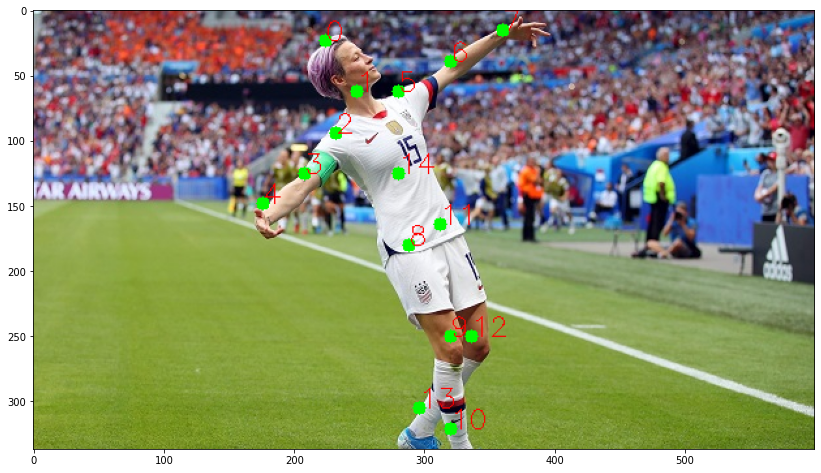

In [ ]:
plt.figure(figsize = (14,10))
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB));

In [ ]:
point_connections = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,14],[14,8],[8,9],[9,10],[14,11],[11,12],[12,13]]

In [ ]:
point_connections

[[0, 1],
 [1, 2],
 [2, 3],
 [3, 4],
 [1, 5],
 [5, 6],
 [6, 7],
 [1, 14],
 [14, 8],
 [8, 9],
 [9, 10],
 [14, 11],
 [11, 12],
 [12, 13]]

In [ ]:
for connection in point_connections:
  # print(connection)
  partA=connection[0]
  partB=connection[1]
  if points[partA] and points[partB]:
    cv2.line(image,points[partA],points[partB],(255,0,0))

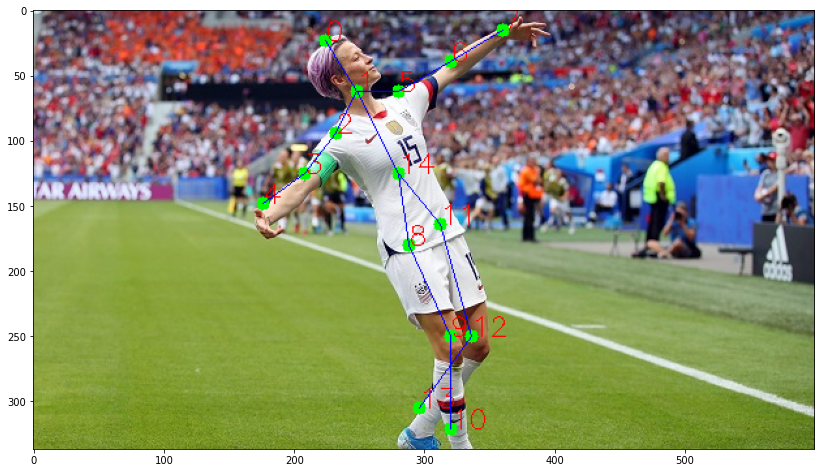

In [ ]:
plt.figure(figsize = (14,10))
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB));

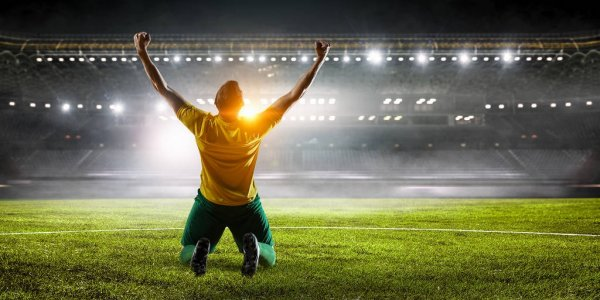

In [ ]:
image2 = cv2.imread('/content/drive/MyDrive/Computer Vision Masterclass/Images/player.jpg')
cv2_imshow(image2)

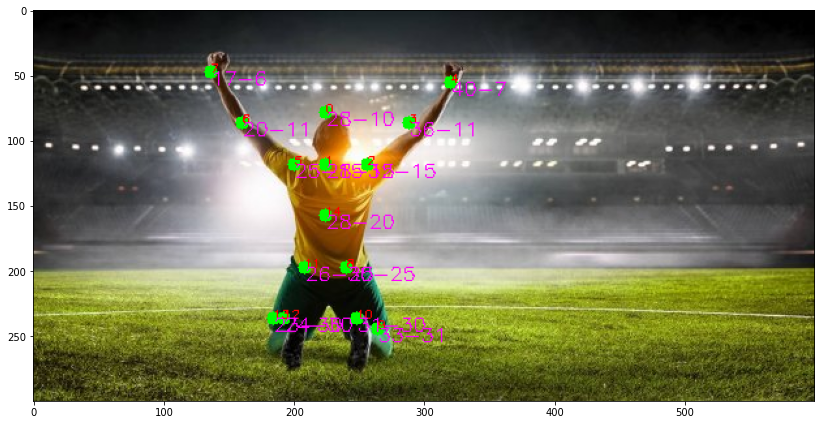

In [ ]:
image2 = cv2.imread('/content/drive/MyDrive/Computer Vision Masterclass/Images/player.jpg')
image_blob2 = cv2.dnn.blobFromImage(image = image2, scalefactor = 1.0 / 255,size = (image2.shape[1],image2.shape[0]))
network.setInput(image_blob2)
output2 = network.forward()
position_width = output2.shape[3]
position_height  = output2.shape[2]
num_points= 15
points =[]
threshold = 0.1
for i in range(num_points):
  confidence_map = output2[0, i,:,:]
  # print(confidence_map)
  _,confidence,_,point = cv2.minMaxLoc(confidence_map)
  # print(confidence,point)
  #this is to rescale the image and get the actual position
  x = int((image2.shape[1]*point[0]/position_width))
  y = int((image2.shape[0]*point[1]/position_height))
  # print(x,y)
  if confidence > threshold:
    cv2.circle(image2,(x,y),5,(0,255,0),thickness=-1)
    cv2.putText(image2,'{}'.format(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.3,(0,0,255))
    cv2.putText(image2 ,'{}-{}'.format(point[0],point[1]), (x,y+10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,0,255))
    points.append((x,y))
  else:
    points.append(None)
plt.figure(figsize=[14,10])
plt.imshow(cv2.cvtColor(image2 , cv2.COLOR_BGR2RGB));

In [ ]:
def verify_arms_up(points):
  head,right_wrist,left_wrist = 0,0,0
  for i,point in enumerate(points):
    # print(i,point)
    if i ==0:
      head = point[1]
    elif i ==4:
      right_wrist = point[1]
    elif i ==7:
      left_Wrist = point[1]
  # print(head, right_wrist, left_Wrist)
  if right_wrist < head and left_wrist < head: #this checks if both the hands are above tha head
    return True
  else:
    return False

In [ ]:
verify_arms_up(points)

True

In [ ]:
video='/content/drive/MyDrive/Computer Vision Masterclass/Videos/gesture1.mp4'
capture= cv2.VideoCapture(video)
connected ,frame = capture.read()

In [ ]:
connected

True

In [ ]:
frame.shape

(1080, 808, 3)

In [ ]:
result = '/content/drive/MyDrive/Computer Vision Masterclass/Videos/gesture1_result.mp4'
save_video = cv2.VideoWriter(result,cv2.VideoWriter_fourcc(*'XVID'),10,(frame.shape[1],frame.shape[0]))

In [ ]:
threshold = 0.1
while cv2.waitKey(1) < 0:
  connected,frame = capture.read()
  if not connected:
    break
  image_blob = cv2.dnn.blobFromImage(image = frame, scalefactor = 1.0 / 255,size = (256,256))
  network.setInput(image_blob)
  output = network.forward()
  position_width = output.shape[3]
  position_height  = output.shape[2]
  num_points= 15
  points =[]
  threshold = 0.1
  for i in range(num_points):
    confidence_map = output[0, i,:,:]
    _,confidence,_,point = cv2.minMaxLoc(confidence_map)
    x = int((frame.shape[1]*point[0]/position_width))
    y = int((frame.shape[0]*point[1]/position_height))
    if confidence > threshold:
      cv2.circle(frame,(x,y),5,(0,255,0),thickness=-1)
      cv2.putText(frame,'{}'.format(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.3,(0,0,255))
      points.append((x,y))
    else:
      points.append(None)
  for connection in point_connections:
      partA=connection[0]
      partB=connection[1]
      if points[partA] and points[partB]:
        cv2.line(frame,points[partA],points[partB],(255,0,0))
  if verify_arms_up(points) == True:
      cv2.putText(frame,'Complete',(50,200),cv2.FONT_HERSHEY_SIMPLEX,3,(0,0,255))
  cv2_imshow(frame)
  save_video.write(frame)
save_video.release()